In [1]:
from langchain_experimental.tools import PythonREPLTool
from dotenv import load_dotenv
from langchain.agents import AgentType, initialize_agent, Tool
from langchain_experimental.agents.agent_toolkits import create_python_agent
from langchain_experimental.agents.agent_toolkits import create_csv_agent
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.chat_models import ChatOpenAI
from langchain_experimental.tools import PythonREPLTool
import pandas as pd
import os
#load variable from .env
load_dotenv()  
openai_api_key = os.getenv('OPENAI_API_KEY')

In [17]:
from langchain.chat_models import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
load_dotenv()  
openai_api_key = os.getenv('OPENAI_API_KEY')

prompt = ChatPromptTemplate.from_template(
    "Tell me a short joke about {topic}"
)
output_parser = StrOutputParser()
model = ChatOpenAI(model="gpt-3.5-turbo")
chain = (
    {"topic": RunnablePassthrough()} 
    | prompt
    | model
    | output_parser
)

chain.invoke("dog")

'Why don\'t scientists trust atoms?\n\nBecause they make up everything, even a dog\'s "pawsome" sense of humor!'

In [20]:
# Define the data as a list of lists
data = [
    [10001, '1953-09-02', 'Georgi', 'Facello', 'M', '1986-06-26'],
    [10002, '1964-06-02', 'Bezalel', 'Simmel', 'F', '1985-11-21'],
    [10003, '1959-12-03', 'Parto', 'Bamford', 'M', '1986-08-28'],
    [10004, '1954-05-01', 'Chirstian', 'Koblick', 'M', '1986-12-01'],
    [10005, '1955-01-21', 'Kyoichi', 'Maliniak', 'M', '1989-09-12'],
    [10006, '1953-04-20', 'Anneke', 'Preusig', 'F', '1989-06-02'],
    [10007, '1957-05-23', 'Tzvetan', 'Zielinski', 'F', '1989-02-10'],
    [10008, '1958-02-19', 'Saniya', 'Kalloufi', 'M', '1994-09-15'],
    [10009, '1952-04-19', 'Sumant', 'Peac', 'F', '1985-02-18'],
    [10010, '1963-06-01', 'Duangkaew', 'Piveteau', 'F', '1989-08-24']
]

# Define the column names
columns = ['emp_no', 'birth_date', 'first_name', 'last_name', 'gender', 'hire_date']

# Create the DataFrame
df = pd.DataFrame(data, columns=columns)
dataframe = df
# print datafrmae
dataframe

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


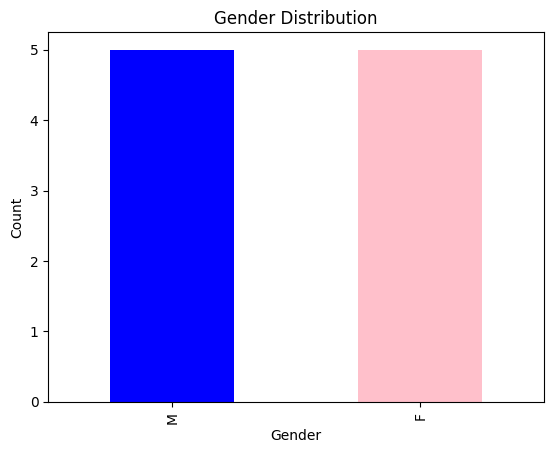

{'input': 'The dataframe has an equal distribution of males and females. The bar graph visually represents this distribution with blue bars for males and pink bars for females.',
 'output': 'Yes, the dataframe has an equal distribution of males and females. The bar graph visually represents this distribution with blue bars for males and pink bars for females.'}

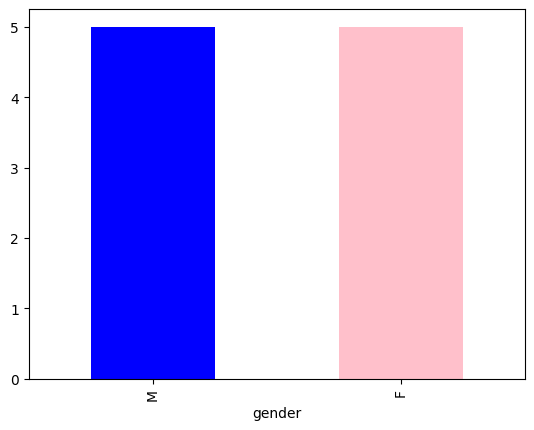

In [33]:
pandas_agent = create_pandas_dataframe_agent(
        llm=ChatOpenAI(temperature=0, model="gpt-4", api_key = openai_api_key),
        agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
        df = dataframe,
        verbose=False,
        handle_parsing_errors=True,)


prompt = "plot a simple graph for me, I want female to be pink and male to be blue and tell me a little about dataframe"

result = pandas_agent.invoke({"input":prompt})

pandas_agent.invoke(result["output"])

In [5]:
#Assign variables
dataframe = dataframe
csv_path =  r"C:\Users\(Ai)AiSukmoren\Desktop\langchain_demo\doc\episode_info.csv"
query = "who was the first person to be hired in the office in the dataframe"

def main():
    print("Start agent execution...")
    python_agent_executor = create_python_agent(
        llm=ChatOpenAI(temperature=0, model="gpt-4", api_key = openai_api_key),
        tool=PythonREPLTool(),
        agent_type= AgentType.ZERO_SHOT_REACT_DESCRIPTION,
        verbose=True,
        handle_parsing_errors=True,
    )
    
    csv_agent = create_csv_agent(
        llm=ChatOpenAI(temperature=0, model="gpt-4", api_key = openai_api_key),
        path = csv_path,
        agent_type = AgentType.ZERO_SHOT_REACT_DESCRIPTION,
        verbose=True,
        handle_parsing_errors=True,
    )
    
    pandas_agent = create_pandas_dataframe_agent(
        llm=ChatOpenAI(temperature=0, model="gpt-4", api_key = openai_api_key),
        agent_type=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
        df = dataframe,
        verbose=True,
        handle_parsing_errors=True,
    )
    
    grand_agent = initialize_agent(
        tools=[
            Tool(
                name="PythonAgent",
                func=python_agent_executor.run,
                description="""useful when you need to transform natural language and write from it python and execute the python code,
                              returning the results of the code execution,
                            DO NOT SEND PYTHON CODE TO THIS TOOL""",
            ),
            Tool(
                name="CSVAgent",
                func=csv_agent.run,
                description="""useful when you need to answer question over episode_info.csv fileepisode_info.csv file,
                             takes an input the entire question and returns the answer after running pandas calculations""",
            ),
            Tool(
                name="PandasAgent",
                func=pandas_agent.run,
                description="""useful when you need to answer question over pandas dataframe that was provide by the name df,
                             takes an input the entire question and returns the answer after running pandas calculations""",
            ),
        ],
        llm=ChatOpenAI(temperature=0, model="gpt-4"),
        agent_type=AgentType.OPENAI_FUNCTIONS,
        verbose=True,
        handle_parsing_errors=True,
    )
    
    grand_agent.run(query)

if __name__ == "__main__":
    main()

Start agent execution...


> Entering new AgentExecutor chain...
I need to find the person who was hired first in the office. This would be the person with the earliest hire date in the dataframe.
Action: PandasAgent
Action Input: Who was the first person to be hired in the office in the dataframe?

> Entering new AgentExecutor chain...
Thought: To find the first person to be hired, I need to sort the dataframe by the 'hire_date' column in ascending order and then select the first row.
Action: python_repl_ast
Action Input: df.sort_values('hire_date').head(1)
Observation:    emp_no  birth_date first_name last_name gender   hire_date
8   10009  1952-04-19     Sumant      Peac      F  1985-02-18
Thought:The first person to be hired in the office according to the dataframe is Sumant Peac.
Final Answer: Sumant Peac was the first person to be hired in the office.

> Finished chain.

Observation: Sumant Peac was the first person to be hired in the office.
Thought:I now know the final answer
F